## TSB-AD Quick Start

### Run AD Model

In this tutorial, we demonstrate how to (i) load a univariate or multivariate time series from the TSB-AD benchmark, (ii) run an unsupervised anomaly detector, and (iii) evaluate its detection quality using standard measures.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from TSB_AD.model_wrapper import run_Semisupervise_AD
from TSB_AD.evaluation.metrics import get_metrics

# Specify Anomaly Detector to use and data directory
AD_Name = 'OmniAnomaly'   # Changed to OmniAnomaly (semi-supervised model)
data_direc = '../Datasets/TSB-AD-U/827_Exathlon_id_18_Facility_tr_10766_1st_12590.csv'

# Loading Data
df = pd.read_csv(data_direc).dropna()
data = df.iloc[:, 0:-1].values.astype(float)
label = df['Label'].astype(int).to_numpy()

print("Loaded data with shape:", data.shape)
print("Loaded labels with shape:", label.shape)

# Extract training index from filename (format: ...tr_XXXXX_...)
train_index = int(data_direc.split('_tr_')[1].split('_')[0])
data_train = data[:train_index, :]
print(f"Training data: {data_train.shape}, Test data: {data.shape}")

# Applying Anomaly Detector (OmniAnomaly requires training data)
output = run_Semisupervise_AD(AD_Name, data_train, data)

# Evaluation
evaluation_result = get_metrics(output, label)

print("Evaluation results:\n", evaluation_result)

Loaded data with shape: (43066, 1)
Loaded labels with shape: (43066,)
Training data: (10766, 1), Test data: (43066, 1)
Model function 'run_PCA' is not defined.


InvalidParameterError: The 'y_score' parameter of roc_auc_score must be an array-like. Got "Model function 'run_PCA' is not defined." instead.

### Plot Time Series with Ground Truth Anomalies

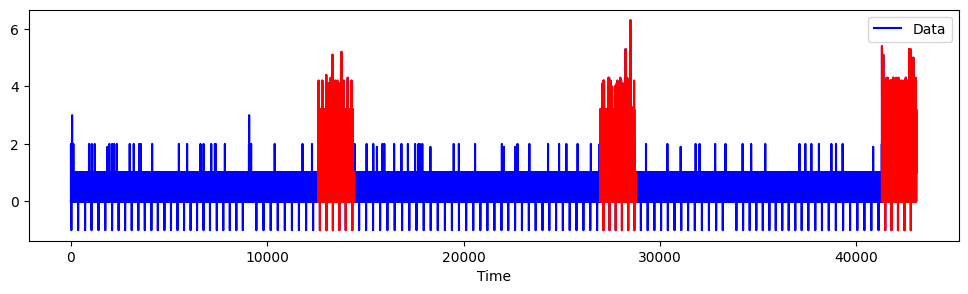

In [17]:
import matplotlib.pyplot as plt
from TSB_AD.evaluation.basic_metrics import basic_metricor

grader = basic_metricor()
range_anomaly = grader.range_convers_new(label)
fig, ax = plt.subplots(figsize=(12, 3))  # Adjust the figure size as needed
ax.plot(range(len(data)), data, color='blue', linewidth=1.5, label='Data')
for r in range_anomaly:
    if r[0] == r[1]:
        ax.plot(r[0], data[r[0]], 'ro', markersize=10)
    else:
        ax.plot(range(r[0], r[1] + 1), data[r[0]:r[1] + 1], color='red', linewidth=1.5) 
plt.legend()
plt.xlabel('Time')
plt.show()